# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import statsmodels.api as sm
from uncertainties import ufloat

# Functions

In [2]:
class reg():
  def C1(R1,R2,tbin,tint):
    return R1*R2*tbin*tint
  def g20(c0):
    return c0/(1+c0)
  def f0(x,c0,c1,K,k1,k2):
    return c1*(1-(K+1)*np.exp(k1*np.abs(x-1072.708))+K*np.exp(k2*np.abs(x-1072.708))+c0)
  def f3(x,c0,c1,K,k1,k2):
    return c1*(1-(K+1)*np.exp(k1*np.abs(x-1072.4133))+K*np.exp(k2*np.abs(x-1072.4133))+c0)
  def f5(x,c0,c1,K,k1,k2):
    return c1*(1-(K+1)*np.exp(k1*np.abs(x-1072.1186))+K*np.exp(k2*np.abs(x-1072.1186))+c0)
  def f7(x,c0,c1,K,k1,k2):
    return c1*(1-(K+1)*np.exp(k1*np.abs(x-1071.8239))+K*np.exp(k2*np.abs(x-1071.8239))+c0)


In [3]:
class QKD():
    @staticmethod
    def df(file, path='../Quantenkryptographie/QKD'):
        # the file must be a txt file
        if '/' in file:
            return pd.read_csv(path + file, sep=' ')
        else:
            return pd.read_csv(path + '/' + file, sep=' ')

    # function to get the str formatation from df to int formatation
    @staticmethod
    def func_df(df, string=True):
        df = df['#TimeHarp']
        if string == True:
            df = df.drop([0,1,2,4,7,5,6,8],axis=0)
            df.index = range(len(df))
            df = df.str.split('\t', expand=True)
            df = df.drop([7],axis=1)
            df.columns = df.iloc[0]
            df = df.drop([0],axis=0)
            df.index = range(len(df))
            for i in df.columns:
                df[i] = df[i].astype(int)
            return df
        else:
            df = df.drop([0,1,2,4,7,5,6,8],axis=0)
            df.index = range(len(df))
            df = df.drop([7],axis=1)
            df.columns = df.iloc[0]
            df = df.drop([0],axis=0)
            df.index = range(len(df))
            for i in df.columns:
                df[i] = df[i].astype(int)
            return df


In [4]:
def f(x, c0, c1, K, k1, k2, x0=0):
    y = c1 * (1 - (K + 1) * np.exp(k1 * np.abs(x - x0)) + K * np.exp(k2 * np.abs(x - x0)) + c0)
    return y


def g(c0):
    return round(c0 / (1 + c0), 4)

# Getting Data

## from github

## Data frames

In [5]:
dp = '../Quantenkryptographie/QKD'
# bob und alic
df_AB = QKD.df('/Alice-bob.txt')
# Autokorrelation
df_ak = QKD.df('Autokorrelation.txt')
df_ak = QKD.func_df(df_ak)
df_AK = QKD.df('Autokorrelation_2.txt')
df_AK = QKD.func_df(df_AK)
# crytal
df_nf = QKD.df('Crystal-NF.txt')
# laser dauer
df_ld = pd.read_csv(dp + '/Laser-Dauer.txt', sep=' ', on_bad_lines='skip')
# laser puls
df_lp = pd.read_csv(dp + '/Laser-Puls.txt', sep=' ', on_bad_lines='skip')

### Autokorrelation

In [6]:
df_ak.head()

,0,1,2,3,5,6,7
0,62,3,23,0,22,0,111
1,76,1,11,0,19,0,129
2,71,1,16,0,17,0,121
3,58,4,16,0,19,0,133
4,79,3,14,0,17,0,107


In [7]:
df_AK.head()

,0,1,2,3,5,6,7
0,62,3,23,8,22,0,111
1,76,1,11,9,19,0,129
2,71,1,16,12,17,0,121
3,58,4,16,16,19,0,133
4,79,3,14,8,17,0,107


In [8]:
# time steps in nano seconds
t = np.array(range(len(df_AK)))*0.2947

In [9]:
df_AK['Time'] = t
df_AK.head()

,0,1,2,3,5,6,7,Time
0,62,3,23,8,22,0,111,0.0000
1,76,1,11,9,19,0,129,0.2947
2,71,1,16,12,17,0,121,0.5894
3,58,4,16,16,19,0,133,0.8841
4,79,3,14,8,17,0,107,1.1788


In [10]:
len(df_AK)

4096

# Alice und Bob

In [11]:
df_AB

,Name,Basis,Bit,Volt
0,Alice,0,0.0,250
1,Alice,0,1.0,540
2,Alice,1,0.0,410
3,Alice,1,1.0,680
4,Bob,0,NaN,360
5,Bob,1,NaN,520


# NF

In [12]:
df_nf.head()

,Messung,Übertragungsrate,P[myW]
0,1,2.23,NaN
1,1,2.15,NaN
2,1,2.13,NaN
3,1,2.16,NaN
4,1,2.25,NaN


In [13]:
print(df_nf['Übertragungsrate'][0:6])

0    2.23
1    2.15
2    2.13
3    2.16
4    2.25
5    2.26
Name: Übertragungsrate, dtype: float64


In [14]:
mean_1 = np.mean(df_nf['Übertragungsrate'][0:7])
var_1 = np.var(df_nf['Übertragungsrate'][0:7])
mean_2 = np.mean(df_nf['Übertragungsrate'][7:13])
var_2 = np.var(df_nf['Übertragungsrate'][7:13])
mean_3 = np.mean(df_nf['Übertragungsrate'][13:17])
var_3 = np.var(df_nf['Übertragungsrate'][13:17])
mean_4 = np.mean(df_nf['Übertragungsrate'][17:22])
var_4 = np.var(df_nf['Übertragungsrate'][17:22])
print(var_1)

0.0024122448979591823


In [15]:
mean = np.array([mean_1,mean_2,mean_3,mean_4])
mean[0] = round(mean[0],2)
mean[1] = round(mean[1],3)
mean[2] = round(mean[2],3)
mean[3] = round(mean[3],3)
var = np.array([var_1,var_2,var_3,var_4])
std = np.sqrt(var)
std[0] = round(std[0],2)
std[1] = round(std[1],3)
std[2] = round(std[2],3)
std[3] = round(std[3],3)
messung = [1,2,3,4]
P = [np.nan,np.nan,0.13,0.02]
nf_df = pd.DataFrame({
    'Messung':messung,
    'Mean':mean,
    'Std':std,
    'Var':var,
    'P [microW]':P
})
nf_df = nf_df.drop([0],axis=0)
nf_df.index = range(3)
nf_df

,Messung,Mean,Std,Var,P [microW]
0,2,2.445,0.024,0.000558,NaN
1,3,1.278,0.018,0.000319,0.13
2,4,0.720,0.006,0.000040,0.02


# Laser Dauerbetrieb

In [16]:
df_ld

,Messung,Übertragungsrate,Dämpfung
0,1,28.65,7.5
1,1,29.33,7.5
2,1,30.03,7.5
3,1,28.74,7.5
4,2,9.29,8.0
5,2,9.04,8.0
6,2,9.15,8.0
7,2,9.17,8.0
8,3,2.67,8.5
9,3,2.68,8.5


In [17]:
mean_ld = np.array([
    np.mean(df_ld['Übertragungsrate'][0:4]),
    np.mean(df_ld['Übertragungsrate'][4:8]),
    np.mean(df_ld['Übertragungsrate'][8:12]),
    np.mean(df_ld['Übertragungsrate'][12:16]),
    np.mean(df_ld['Übertragungsrate'][16:19])
    ])
mean_ld[0] = round(mean_ld[0],1)
mean_ld[1] = round(mean_ld[1],2)
mean_ld[2] = round(mean_ld[2],3)
mean_ld[3] = round(mean_ld[3],3)
mean_ld[4] = round(mean_ld[4],3)
var_ld = np.array([
    np.var(df_ld['Übertragungsrate'][0:4]),
    np.var(df_ld['Übertragungsrate'][4:8]),
    np.var(df_ld['Übertragungsrate'][8:12]),
    np.var(df_ld['Übertragungsrate'][12:16]),
    np.var(df_ld['Übertragungsrate'][16:19])
    ])
std_ld = np.sqrt(var_ld)
std_ld[0] = round(std_ld[0],1)
std_ld[1] = round(std_ld[1],2)
std_ld[2] = round(std_ld[2],3)
std_ld[3] = round(std_ld[3],3)
std_ld[4] = round(std_ld[4],3)
print(mean_ld)
print(std_ld)
ld_df = pd.DataFrame({
    'Messung':[1,2,3,4,5],
    'Mean': mean_ld,
    'Std':std_ld,
    'Var': var_ld,
    'Dämpfung':[7.5,8,8.5,9,9.5]
})
ld_df

[29.2    9.16   2.67   0.878  0.323]
[0.6   0.09  0.007 0.008 0.005]


,Messung,Mean,Std,Var,Dämpfung
0,1,29.200,0.600,0.304819,7.5
1,2,9.160,0.090,0.007869,8.0
2,3,2.670,0.007,0.000050,8.5
3,4,0.878,0.008,0.000069,9.0
4,5,0.323,0.005,0.000022,9.5


# Laser Puls

In [18]:
df_lp

,Messung,Übertragungsrate,Dämpfung
0,1,175.44,6.0
1,1,172.41,6.0
2,1,175.44,6.0
3,1,178.57,6.0
4,2,63.69,6.5
5,2,63.69,6.5
6,2,64.52,6.5
7,2,65.29,6.5
8,3,19.12,7.0
9,3,18.52,7.0


In [19]:
d = [6,6.5,7,7.5,8]
var_lp = np.array([
    np.var(df_lp['Übertragungsrate'][0:4]),
    np.var(df_lp['Übertragungsrate'][4:8]),
    np.var(df_lp['Übertragungsrate'][8:12]),
    np.var(df_lp['Übertragungsrate'][12:16]),
    np.var(df_lp['Übertragungsrate'][16:20])
])
std_lp = np.sqrt(var_lp)
print(std_lp)
std_lp[0] = round(std_lp[0],0)
std_lp[1] = round(std_lp[1],1)
std_lp[2] = round(std_lp[2],2)
std_lp[3] = round(std_lp[3],2)
std_lp[4] = round(std_lp[4],3)
mean_lp = np.array([
    round(np.mean(df_lp['Übertragungsrate'][0:4]),0),
    round(np.mean(df_lp['Übertragungsrate'][4:8]),1),
    round(np.mean(df_lp['Übertragungsrate'][8:12]),2),
    round(np.mean(df_lp['Übertragungsrate'][12:16]),2),
    round(np.mean(df_lp['Übertragungsrate'][16:20]),3)
])
lp_df = pd.DataFrame({
    'Messung':[1,2,3,4,5],
    'Dämpfung':d,
    'Mean':mean_lp,
    'Std':std_lp,
    'Var':var_lp
})
lp_df

[2.17803237 0.66570921 0.24097458 0.09233093 0.0147902 ]


,Messung,Dämpfung,Mean,Std,Var
0,1,6.0,175.000,2.000,4.743825
1,2,6.5,64.300,0.700,0.443169
2,3,7.0,18.750,0.240,0.058069
3,4,7.5,5.400,0.090,0.008525
4,5,8.0,2.338,0.015,0.000219


# Autokorrelation

## Übersicht verschaffen

In [20]:
cls1 = [
    '0',
    # '1',
    # '2',
    '3',
    # '4',
    '5',
    # '6',
    '7'
    ]
# color = [
#     # 'black',
#     'red',
#     # 'green',
#     'blue',
#     # 'orange',
#     # 'yellow',
#     # 'gray'
# ]
x = df_AK['Time']
for i in range(len(cls1)):
  # print(cls1[i])
  plt.plot(x,df_AK[cls1[i]],
          #  '.',
           alpha=0.8,
          #  color=color[i],
           label=f'{cls1[i]}')
  # plt.plot(x,df_ak[i])
plt.yticks([-10,-10,1,10,100,1000])
plt.legend()
plt.yscale('log')

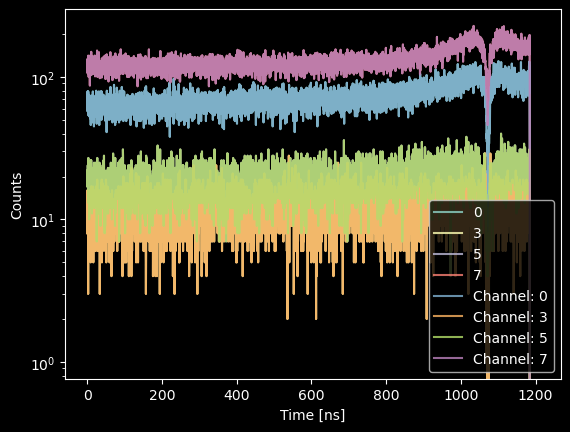

In [21]:
# print(df_AK.columns)
df_new = df_AK[['0','3','5','7','Time']]
lst = ['0','3','5','7']
x = df_new['Time']
for i in lst:
  plt.plot(x,df_new[i],
           label=f'Channel: {i}',
           alpha=0.8
           )
plt.yscale('log')
plt.xlabel('Time [ns]')
plt.ylabel('Counts')
plt.legend()
plt.show()

## dropping last few rows

In [22]:
df_AK.tail()

,0,1,2,3,5,6,7,Time
4091,0,0,0,0,0,0,0,1205.6177
4092,0,0,0,0,0,0,0,1205.9124
4093,0,0,0,0,0,0,0,1206.2071
4094,0,0,0,0,0,0,0,1206.5018
4095,0,0,0,0,0,0,0,1206.7965


In [23]:
droping_rows = np.arange(4021,len(df_AK))
# print(droping_rows)
# print(len(df_AK))

In [24]:
df_AK[4000:4050]
df_AK = df_AK.drop(droping_rows,axis=0)

In [25]:
df_AK.tail()

,0,1,2,3,5,6,7,Time
4016,128,7,26,8,31,0,183,1183.5152
4017,84,1,5,16,19,0,144,1183.8099
4018,120,3,17,8,27,0,197,1184.1046
4019,67,1,16,12,24,0,155,1184.3993
4020,34,1,7,9,11,0,82,1184.6940


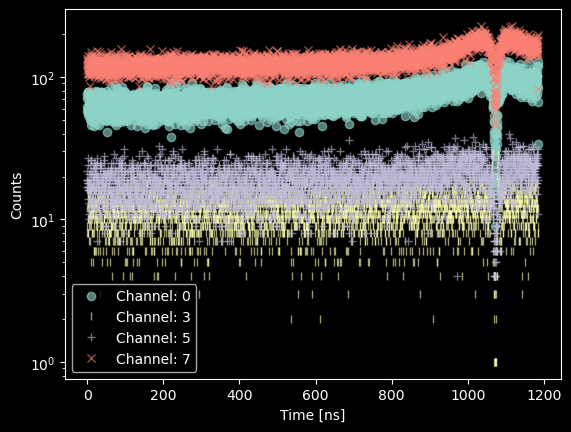

In [26]:
# print(df_AK.columns)
df_new = df_AK[['0','3','5','7','Time']]
lst = ['0','3','5','7']
forms = ['o','|','+','x']
t = df_new['Time']
for i in range(len(lst)):
  plt.plot(t,df_new[lst[i]],
           label=f'Channel: {lst[i]}',
           alpha=0.6,
           linestyle='None',
           marker=forms[i]
           )
plt.yscale('log')
plt.xlabel('Time [ns]')
plt.ylabel('Counts')
plt.legend()
plt.show()

## Regression
$$ f(x) = C_1 (1-(K+1) \exp(k_1|x-x_0|) + K \exp(k_2|x-x_0|)+C_0) $$

Kontrast:
$$ K= \frac{|R_1-R_2|}{R_1+R_2}$$
Konstante $C_1$:
$$ C_1 = R_1 R_2 t_{bin}t_{int} $$

In [27]:
df_new.columns

Index(['0', '3', '5', '7', 'Time'], dtype='object', name=0)

In [28]:
for i in df_new.columns:
  print(f'The min of {i} is {min(df_new[i])}')
  x = df_new.index[df_new[i] == min(df_new[i])].tolist()
  print(f'the index is: {x}')
  # for j in x:
  #   print(f' - col: {i}, min. y: {min(df_new[i])}, t={df_new['Time'][j]}')

  print('\n')

The min of 0 is 9
the index is: [3640]


The min of 3 is 0
the index is: [3636, 3639, 3643, 3646]


The min of 5 is 4
the index is: [3301, 3631, 3634, 3637, 3638]


The min of 7 is 46
the index is: [3637]


The min of Time is 0.0
the index is: [0]




In [29]:
df_new['Time'][3638]

np.float64(1072.1186)

### Channel 0

In [30]:
# curve fit the test data
# Initial guess for parameters (c0, c1, K, k1, k2)
initial_guess = (6.3792645, 10.0, 247.318715, -0.790101, -0.8379343)

param_bounds = ([0,0, -1, -2, -2e3],
                [10,1e3,1e3,2,2])
y0 = df_new['0']
fittedParameters_c0, pcov = curve_fit(reg.f0,
                                   t,
                                   y0,
                                  #  np.log(df_new['0']),
                                   p0=initial_guess,
                                   bounds=param_bounds,
                                   maxfev=12000)
fittedParameters_c0 = list(fittedParameters_c0)
for i in range(len(fittedParameters_c0)):
  fittedParameters_c0[i] = round(fittedParameters_c0[i],7)
print('Parameters', fittedParameters_c0)


Parameters [np.float64(0.3973412), np.float64(52.8284264), np.float64(261.2126362), np.float64(-0.6761526), np.float64(-0.680433)]


In [31]:
print(np.sqrt(np.diag(pcov)))
var_name = ['C_0','C_1','K','k1','k2']
#0.3971789, 52.8345761, 261.1607891, -0.6760478, -0.6803267
par_c0 = np.array([0.3971789, 52.8345761, 261.1607891, -0.6760478, -0.6803267])
u_c0 = np.array([3.07580395e-01 ,1.16316901e+01 ,
                 8.11884339e+06 ,6.59487973e+01,
 6.68218748e+01])
for i in range(len(var_name)):
  print(f'{var_name[i]}: {ufloat(par_c0[i],u_c0[i])}')

[3.16097118e-01 1.19504542e+01 7.16218876e+06 5.81915087e+01
 5.89502875e+01]
C_0: 0.40+/-0.31
C_1: 53+/-12
K: (0+/-8)e+06
k1: (-0+/-7)e+01
k2: (-0+/-7)e+01


In [32]:
# g^(2)
g0_c0 = g(3.07580395e-01)
g0_c0

0.2352

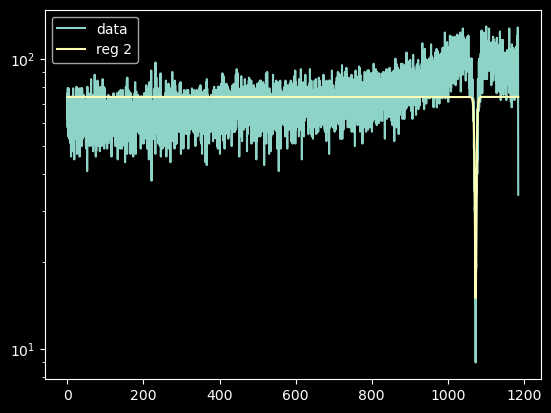

In [33]:
plt.plot(t,df_new['0'],
         label='data')

# plt.plot(t,reg.f0(t,6.0, 10, 0.475, 0.00238, 0.003),
#          label='reg')
# plt.plot(t,reg.f0(t,5.3317709708336185, 20., 0.4, 0.003, 0.004149956693096553),
#          label='Beste regression bisher')
plt.plot(t,reg.f0(t,0.3971789, 52.8345761, 261.1607891, -0.6760478, -0.6803267),
         label='reg 2')
plt.legend()
plt.yscale('log')
plt.show()

#### MSE

In [34]:
y_h0 = reg.f0(t,0.3971789, 52.8345761, 261.1607891, -0.6760478, -0.6803267)
mse_c0 = (y0-y_h0)**2
plt.plot(t,mse_c0)

### Channel 3

In [35]:
x = np.array(t)
y3 = np.array(df_new['3'])
print(min(y3))
for i in range(len(y3)):
  if 0 == y3[i]:
    print(i)

0
3636
3639
3643
3646


In [36]:
plt.plot(x,y3)
plt.yscale('log')

In [37]:
# curve fit the test data
# Initial guess for parameters (c0, c1, K, k1, k2)
p0 = [0.0, -0.0004805, 0.0500026, 0.01, 0.0005]
bounds = ([-.1,-.1,0.03,-0.01,-10],
          [.0001,-.0003,2000,0.03,0.0009])
fittedParameters, pcov = curve_fit(reg.f3,
                                   t,
                                   y3,
                                  #  np.log(y3),
                                   p0= p0,
                                   bounds=bounds,
                                   maxfev=12000)
fittedParameters = list(fittedParameters)
for i in range(len(fittedParameters)):
  fittedParameters[i] = round(fittedParameters[i],7)
print('Parameters', fittedParameters)
print('Uncertainties:', np.sqrt(np.diag(pcov)))

Parameters [np.float64(5.84e-05), np.float64(-0.0794694), np.float64(161.0048913), np.float64(-0.0001159), np.float64(-0.370654)]
Uncertainties: [2.08292304e+01 9.60417111e+01 1.94580902e+05 9.17936552e-04
 6.97268837e-02]


In [38]:
# best shoot 1
bs1 = np.array([[ 2.46816495e+02,-9.02274856e+01,-1.87994532e+05 ,1.17078022e-03
  ,-3.13733432e-01],
 [-9.02274856e+01,  6.58887219e+03,  1.37460899e+07, -6.94330081e-02,
   4.88897659e-01],
 [-1.87994532e+05  ,1.37460899e+07  ,2.86778957e+10 ,-1.44854995e+02
   ,1.01966973e+03],
 [ 1.17078022e-03 ,-6.94330081e-02, -1.44854995e+02 , 7.32095668e-07
  ,-5.48866961e-06],
 [-3.13733432e-01 , 4.88897659e-01  ,1.01966973e+03 ,-5.48866961e-06
   ,8.08604501e-04]])
u_best_sh_1 = np.sqrt(np.diag(bs1))
print(u_best_sh_1)
print(f'From: {-0.0001, -0.0786445, 164.0722689, -0.0001279, -0.2}')

[1.57103945e+01 8.11718682e+01 1.69345492e+05 8.55625893e-04
 2.84359720e-02]
From: (-0.0001, -0.0786445, 164.0722689, -0.0001279, -0.2)


In [39]:
# final reg
# data: 5.84e-05, -0.0794694, 161.0048806, -0.0001159, -0.3706534
par_c3 = np.array([5.84e-05, -0.0794694, 161.0048806, -0.0001159, -0.3706534])
# print(pcov)
bs2 = np.array([[ 4.33856656e+02 ,-7.27538800e+01 ,
                 -1.46968567e+05 , 1.03938875e-03,
  -1.01647100e+00],
 [-7.27538800e+01 , 9.22552845e+03  ,
  1.86909556e+07, -8.81494427e-02,
   1.00778082e+00],
 [-1.46968567e+05 , 1.86909556e+07 ,
  3.78679473e+10 ,-1.78590779e+02,
   2.04077674e+03],
 [ 1.03938875e-03 ,-8.81494427e-02,
  -1.78590779e+02 , 8.42746383e-07,
  -1.05401646e-05],
 [-1.01647100e+00 , 1.00778082e+00  ,2.04077674e+03, -1.05401646e-05,
   4.86177622e-03]])
u_c3 = np.sqrt(np.diag(bs2))
# u_c3
print('Channel 3')
for i in range(len(var_name)):
  print(f'{var_name[i]}: {ufloat(par_c3[i],u_c3[i])}')

Channel 3
C_0: 0+/-21
C_1: (-0.0+/-1.0)e+02
K: (0.0+/-1.9)e+05
k1: -0.0001+/-0.0009
k2: -0.37+/-0.07


In [40]:
# g^(2)
g0_c3 = g(5.84e-05)
g0_c3

0.0001

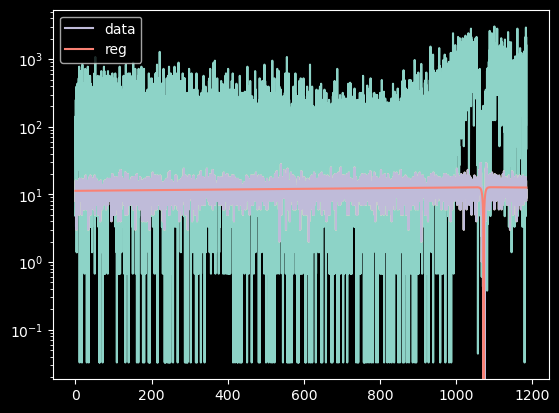

In [41]:
plt.plot(t,y3,label='data')
# plt.plot(x,reg.f3(x,0.0, -0.0004805, 0.0500026, 0.01, 0.0005),
#          label='Best shoot 2')
# plt.plot(x,reg.f3(x,-0.0001, -0.0786445, 164.0722689, -0.0001279, -0.2),
#          label='best shoot 1')
plt.plot(t,reg.f3(t,5.84e-05, -0.0794694, 161.0048806, -0.0001159, -0.3706534),
         label='reg')
plt.yscale('log')
plt.legend()
plt.show()

#### MSE

In [42]:
y_h3 = reg.f3(t,5.84e-05, -0.0794694, 161.0048806, -0.0001159, -0.3706534)
mse_c3 = (y3-y_h3)**2
plt.plot(t,mse_c3)

### Channel 5

In [43]:
y5 = df_new['5']
plt.plot(t,y5)
plt.yscale('log')

In [44]:
# curve fit the test data
# Initial guess for parameters (c0, c1, K, k1, k2)
p0 = [0.0505325, 99.9999999, -0.1676983, 6.11e-05, -0.1193754]
bounds = ([-1,1.1,-100,-1,-10],
          [10,1e4,0,1,0.1])
fittedParameters, pcov = curve_fit(reg.f5,
                                   t,
                                   y5,
                                  #  np.log(y5),
                                   p0= p0,
                                   bounds=bounds,
                                   maxfev=12000)
fittedParameters = list(fittedParameters)
for i in range(len(fittedParameters)):
  fittedParameters[i] = round(fittedParameters[i],7)
print('Parameters', fittedParameters)


Parameters [np.float64(0.0005103), np.float64(9851.3622657), np.float64(-0.0017097), np.float64(5e-07), np.float64(-0.1188041)]


In [45]:
print(np.sqrt(np.diag(pcov)))
# uncertainties from 0.1903525, 29.9999999, -0.5306807, 0.0003066, -0.1184747:
u_par1c5 = np.array([1.20392800e-01,1.81689446e+01 ,3.20349060e-01 ,
                  3.36808991e-04, 1.36257646e-02])
# uncertainties from 0.0505325, 99.9999999, -0.1676983, 6.11e-05, -0.1193754
u_par2c5 = np.array([2.31182571e-01, 4.59337170e+02 ,
                   7.70068734e-01 ,3.26489662e-04,
 1.31003402e-02])
# 0.0050552, 999.9972208, -0.0168129, 5.4e-06, -0.1185274
u_par3c5 = np.array([3.00788246e-01 ,5.95251453e+04 ,
                   1.00076645e+00 ,3.23846654e-04,
 1.29439456e-02])
# 0.0005211, 9705.3277521, -0.0017325, 5e-07, -0.1184373
u_par4c5 = np.array([1.22407968e-04,2.16039895e-11 ,1.21637439e-04 ,
                   2.38426449e-08,
 1.23636051e-02])
# 0.0005101, 9854.3369425, -0.0017092, 5e-07, -0.1188041
par_c5 = np.array([0.0005101, 9854.3369425, -0.0017092, 5e-07, -0.1188041])
u_c5 = np.array([1.20736751e-04 ,2.08565031e-11,
                     1.19979661e-04 ,2.34803363e-08,
 1.23969113e-02])
print('Channel 5')
for i in range(len(var_name)):
  print(f'{var_name[i]}: {ufloat(par_c5[i],u_c5[i])}')

[1.20773210e-04 2.08739684e-11 1.20015891e-04 2.34874346e-08
 1.23969117e-02]
Channel 5
C_0: 0.00051+/-0.00012
C_1: 9854.336942500000+/-0.000000000021
K: -0.00171+/-0.00012
k1: (5.00+/-0.23)e-07
k2: -0.119+/-0.012


In [46]:
# g0
g0_c5 = g(0.0005101)
g0_c5

0.0005

In [47]:
plt.plot(t,y5,
         color='black',
         linewidth=2,
         label='data')
plt.plot(t,reg.f5(t,0.0005101, 9854.3369425, -0.0017092, 5e-07, -0.1188041),
         color='white',
         linewidth=1,
         label='reg')

plt.yscale('log')
plt.yticks([1,10,100])
plt.xlabel('Time [ns]')
plt.ylabel('Counts')
# plt.legend()

Text(25.077931450737843, 0.5, 'Counts')

#### MSE

In [48]:
y_h5 = reg.f5(t,0.0005101, 9854.3369425, -0.0017092, 5e-07, -0.1188041)
mse_c5 = (y5-y_h5)**2
plt.plot(t,mse_c5)

### channel 7

In [49]:
y7 = df_new['7']
t = np.array(df_new['Time'])
plt.plot(t,y7,label='data')
plt.legend()
plt.yscale('log')

In [50]:
# curve fit the test data
# Initial guess for parameters (c0, c1, K, k1, k2)
p0 = [0.0505325, 99.9999999, -0.1676983, 6.11e-05, -0.1193754]
bounds = ([-1,1.1,-100,-1,-10],
          [1,100,0,1,0.1])
fittedParameters, pcov = curve_fit(reg.f7,
                                   t,
                                   y7,
                                  #  np.log(y5),
                                   p0= p0,
                                   bounds=bounds,
                                   maxfev=12000)
fittedParameters = list(fittedParameters)
for i in range(len(fittedParameters)):
  fittedParameters[i] = round(fittedParameters[i],7)
print('Parameters', fittedParameters)


Parameters [np.float64(0.862446), np.float64(64.8793538), np.float64(-2.5179021), np.float64(-0.0094888), np.float64(-0.0927043)]


In [51]:
# 0.8745773, 64.4584305, -2.5265066, -0.0094633, -0.0924454
par_c7 = np.array([0.8745773, 64.4584305, -2.5265066, -0.0094633, -0.0924454])
print(np.sqrt(np.diag(pcov)))
u_c7 = np.array([8.44891906e-02, 2.94296095e+00 ,
                    8.60581450e-02 ,2.74721926e-04,
 3.59272303e-03])
print('Channel 7')
for i in range(len(var_name)):
  print(f'{var_name[i]}: {ufloat(par_c7[i],u_c7[i])}')

[8.44891924e-02 2.94296088e+00 8.60581475e-02 2.74721928e-04
 3.59272297e-03]
Channel 7
C_0: 0.87+/-0.08
C_1: 64.5+/-2.9
K: -2.53+/-0.09
k1: -0.00946+/-0.00027
k2: -0.092+/-0.004


In [52]:
# g0
g0_c7 = g(0.8624459)
g0_c7

0.4631

In [53]:
plt.plot(t,y7,
         label='data')
plt.plot(t,reg.f7(t,0.8624459, 64.8793552, -2.517902, -0.0094888, -0.0927043),
         label='reg')
plt.yscale('log')
plt.legend()

#### MSE

In [54]:
y_h7 = reg.f7(t,0.8624459, 64.8793552, -2.517902, -0.0094888, -0.0927043)
mse_c7 = (y7-y_h7)**2
plt.plot(t,mse_c7)

## all plots with regression

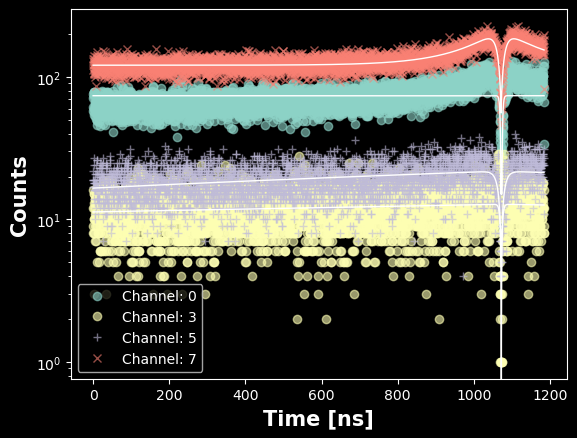

In [99]:
# print(df_AK.columns)
df_new = df_AK[['0','3','5','7','Time']]
lst = ['0','3','5','7']
forms = ['o','o','+','x']
t = df_new['Time']
for i in range(len(lst)):
  plt.plot(t,df_new[lst[i]],
           label=f'Channel: {lst[i]}',
           alpha=0.6,
           linestyle='None',
           marker=forms[i]
           )

# channel 0 reg
plt.plot(t,reg.f0(t,0.3971789, 52.8345761, 261.1607891, -0.6760478, -0.6803267),
         color='white',
         linewidth=1,
        #  label='C0'
         )
# channel 3 reg
plt.plot(t,reg.f3(t,5.84e-05, -0.0794694, 161.0048806, -0.0001159, -0.3706534),
         color='white',
         linewidth=1,
        #  label='reg'
         )
# channel 5 reg
plt.plot(t,reg.f5(t,0.0005101, 9854.3369425, -0.0017092, 5e-07, -0.1188041),
         color='white',
         linewidth=1,
        #  label='reg'
         )
# channel 7 reg
plt.plot(t,reg.f7(t,0.8624459, 64.8793552, -2.517902, -0.0094888, -0.0927043),
         color='white',
         linewidth=1,
        #  label='reg'
         )
plt.yscale('log')
plt.xlabel('Time [ns]',
           fontsize=15, fontweight='bold')
plt.ylabel('Counts',
           fontsize=15, fontweight='bold')
plt.legend()
plt.show()
# plt.savefig('Autocorrelation.png',dpi=700,transparent=True)

## MSE for all 4 channels

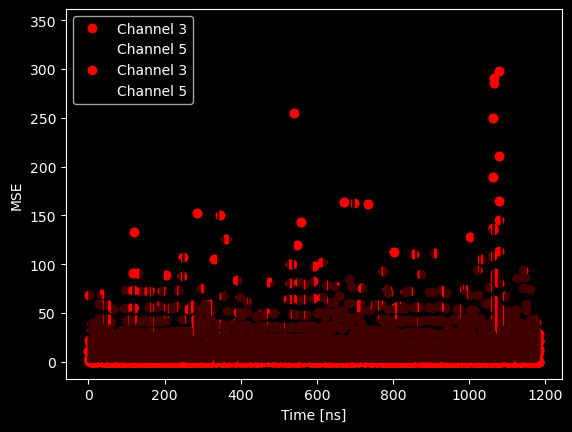

In [97]:
# plt.plot(t,mse_c0,
#          alpha=0.95,
#          color='blue',
#          label='Channel 0')
plt.plot(t,mse_c3,
        #  alpha=0.8,
         'ro',
        #  color='k',
        #  markers='+',
         label='Channel 3')
plt.plot(t,mse_c5,
         alpha=0.75,
        #  'ro',
         color='k',
        #  markers='o',
         label='Channel 5')
# plt.plot(t,mse_c7,
#          alpha=0.4,
#          color='olive',
#          label='Channel 7')
plt.legend()
plt.xlabel('Time [ns]')
plt.ylabel('MSE')
plt.show()

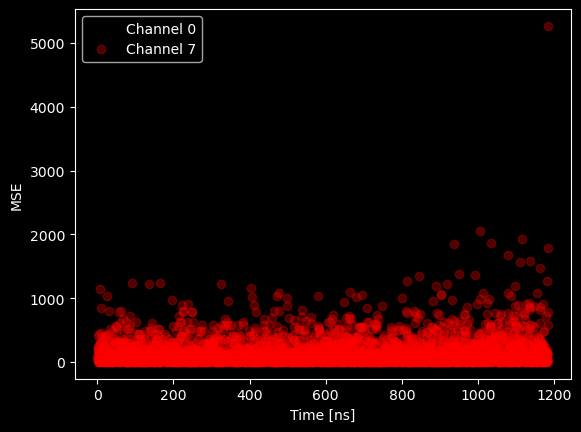

In [98]:
plt.plot(t,mse_c0,
         'k+',
        #  alpha=0.95,
         label='Channel 0')
plt.plot(t,mse_c7,
         'ro',
         alpha=0.3,
        #  color='olive',
         label='Channel 7')
plt.legend()
plt.xlabel('Time [ns]')
plt.ylabel('MSE')
plt.show()

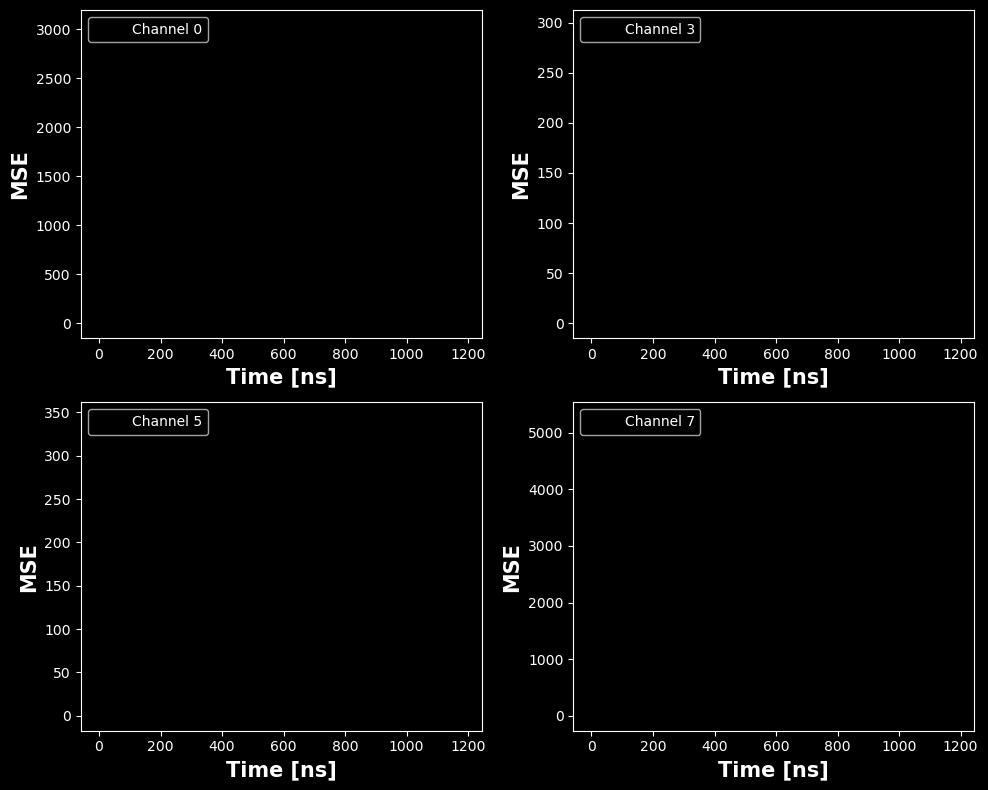

In [95]:
# Generate some example data
time = t
mse_values = [mse_c0,mse_c3,mse_c5,mse_c7]
titles = ['Channel 0','Channel 3','Channel 5','Channel 7']
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1
axs[0, 0].plot(time, mse_values[0], label=titles[0],color='k')
axs[0, 0].set_xlabel('Time [ns]',
           fontsize=15, fontweight='bold')
axs[0, 0].set_ylabel('MSE',
           fontsize=15, fontweight='bold')
axs[0, 0].legend()

# Plot 2
axs[0, 1].plot(time, mse_values[1],  label=titles[1], color='k')
axs[0, 1].set_xlabel('Time [ns]',
           fontsize=15, fontweight='bold')
axs[0, 1].set_ylabel('MSE',
           fontsize=15, fontweight='bold')
axs[0, 1].legend()

# Plot 3
axs[1, 0].plot(time, mse_values[2], label=titles[2], color='k')
axs[1, 0].set_xlabel('Time [ns]',
           fontsize=15, fontweight='bold')
axs[1, 0].set_ylabel('MSE',
           fontsize=15, fontweight='bold')
axs[1, 0].legend()

# Plot 4
axs[1, 1].plot(time, mse_values[3], label=titles[3], color='k')
axs[1, 1].set_xlabel('Time [ns]',
           fontsize=15, fontweight='bold')
axs[1, 1].set_ylabel('MSE',
           fontsize=15, fontweight='bold')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()
# plt.savefig('MSE-Channels.png',dpi=800,transparent=True)

## g0

In [59]:
C0 = np.array([par_c0[0],par_c3[0],par_c5[0],par_c7[0]])
u_c0 = np.array([u_c0[0],u_c3[0],u_c5[0],u_c7[0]])
u_c0

array([3.07580395e-01, 2.08292260e+01, 1.20736751e-04, 8.44891906e-02])

In [60]:
g = [g0_c0,
     g0_c3,g0_c5,g0_c7]
for i in range(4):
  print(g[i])

0.2352
0.0001
0.0005
0.4631


### Gauß Fehlerfortpflanzung

In [61]:
def u_g(C0,u_c0):
  return (1-C0/(1+C0))*u_c0/(1+C0)

In [62]:
u_gg = u_g(C0,u_c0)
u_gg

array([1.57563135e-01, 2.08267934e+01, 1.20613670e-04, 2.40433203e-02])

In [63]:
ugg_v2 = np.array([1.57563135e-01,
                  #  2.08267934e+01,
                   1.20613670e-04, 2.40433203e-02])

In [64]:
g_err = []
for i in range(4):
  x = ufloat(g[i],u_gg[i])
  g_err.append(x)

g_err = np.array([g_err])#*100

In [65]:
g_err

array([[0.2352+/-0.15756313511558204, 0.0001+/-20.826793365287223,
        0.0005+/-0.00012061366955040543, 0.4631+/-0.024043320312081767]],
      dtype=object)

## plot between mse max and g0

In [66]:
# help(plt)
lst = [1,2,3,4,5]
lst[1:]

[2, 3, 4, 5]

In [67]:
g2 = [g0_c0,
    #  g0_c3,
      g0_c5,g0_c7]

folgende Tabelle überarbeiten

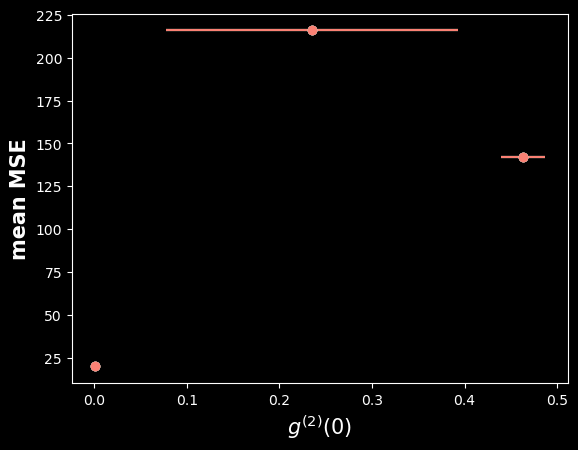

In [93]:
x_g = g
x2 = g2
y_mse_max = np.array([
    max(mse_values[0]),
    # max(mse_values[1]),
    max(mse_values[2]),
         max(mse_values[3])])
y_mse_mean = np.array([
    np.mean(mse_values[0]),
    # np.mean(mse_values[1]),
    np.mean(mse_values[2]),
         np.mean(mse_values[3])])
# plt.plot(x_g,y_mse_max,'ko',label='Max')
plt.errorbar(x2,y_mse_mean,fmt='o',xerr=ugg_v2,label='mean')
# plt.xticks([0,.25,.5])
# plt.yticks([0,2750,5500])
plt.xlabel('$g^{(2)}(0)$',
           fontsize=15, fontweight='bold')
plt.ylabel('mean MSE',
           fontsize=15, fontweight='bold')
plt.show()

In [69]:
# help(sm.OLS)

In [70]:
# x_const = sm.add_constant(x_g)
# m = sm.OLS(y_mse,x_const)
# r = m.fit()
# print(r.summary())

# Data from the pictures

In [71]:
# Crystall
nf_pic_info = pd.DataFrame({
    'pic' : [1,2,3],
'Counts [kcts/s]':[79.17,40.32,22.27],
'wrong_range' : [0,0,0],
'wrong_detec' : [340,44,24],
'wrong_basis' : [104763,30027,40091],
'wrong_key' : [10398,3042,4340],
'valid_key' : [94499,26887,35545],
'valid_range' : [1,1,1],
'valid_detec' : [.99838,0.99927,.99970],
'valid_base' : [0.50032,0.49918,0.49871],
'wrong_key' : [.09913,0.10164,0.10881],
'valid_key' : [.90087,0.89836, 0.89119]
})
nf_pic_info['std counts'] = nf_pic_info['Counts [kcts/s]']

In [72]:
# laserdauer
ld_pic_info = pd.DataFrame({
    'pic':[1,2,3,4,5],
    'Counts [kcts/s]':[911.40,285.92,80.17,27.87,9.63],
    'wrong_range' : [0,0,0,0,0],
    'wrong_detec' : [19594,1830,157,29,17],
    'wrong_basis' : [792483,244087,64925,34927,29748],
    'wrong_key' : [78718,24723,6962,4281,4854],
    'valid_key' : [719205,219360,57956,30763,25381],
    'valid_range' : [1,1,1,1,1],
    'valid_detec' : [0.98783,0.99627,0.99879,0.99959,0.99972],
    'valid_base' : [0.50171,.5,0.49997,0.50084,0.50406],
    'wrong_key' : [0.09865,0.10129,0.10724,0.12216,0.16054],
    'valid_key' : [0.90135,0.89871,0.89276,0.87784,0.83946]
})
# Fehlerabschätzung
ld_pic_info['std counts'] = 0.1*ld_pic_info['Counts [kcts/s]']

In [73]:
# Pulse
lp_pic_info = pd.DataFrame({
    'pic': [1,2,3,4,5],
    'Counts [kcts/s]': [517.59,178.21,52.08,15.71,7.09],
    'wrong_range': [0,0,0,0,0],
    'wrong_detec': [47426,4198,5765,307,81],
    'wrong_basis': [222628,71847,366474,75048,40184],
    'wrong_key': [18928,6729,35723,7858,4351],
    'valid_key': [221018,67226,332038,66787,35384],
    'valid_range': [1,1,1,1,1],
    'valid_detec': [0.90701,0.97201,0.99221,0.99795,0.99899],
    'valid_base': [0.51872,0.50723,0.50088,0.49865,0.49719],
    'wrong_key': [0.07888,0.09099,0.09714,0.10527,0.10950],
    'valid_key': [0.92112,0.90901,0.90286,0.89473,0.89050]
})
# error counts
lp_pic_info['std count'] = lp_pic_info['Counts [kcts/s]'] *0.1
lp_pic_info

,pic,Counts [kcts/s],wrong_range,wrong_detec,wrong_basis,wrong_key,valid_key,valid_range,valid_detec,valid_base,std count
0,1,517.59,0,47426,222628,0.07888,0.92112,1,0.90701,0.51872,51.759
1,2,178.21,0,4198,71847,0.09099,0.90901,1,0.97201,0.50723,17.821
2,3,52.08,0,5765,366474,0.09714,0.90286,1,0.99221,0.50088,5.208
3,4,15.71,0,307,75048,0.10527,0.89473,1,0.99795,0.49865,1.571
4,5,7.09,0,81,40184,0.10950,0.89050,1,0.99899,0.49719,0.709


# QBER

In [74]:
x_q = [nf_pic_info['Counts [kcts/s]'],
       ld_pic_info['Counts [kcts/s]'],
       lp_pic_info['Counts [kcts/s]']]
y_q = [nf_pic_info['wrong_key'],
       ld_pic_info['wrong_key'],
       lp_pic_info['wrong_key']]


In [75]:
# help(plt.plot)

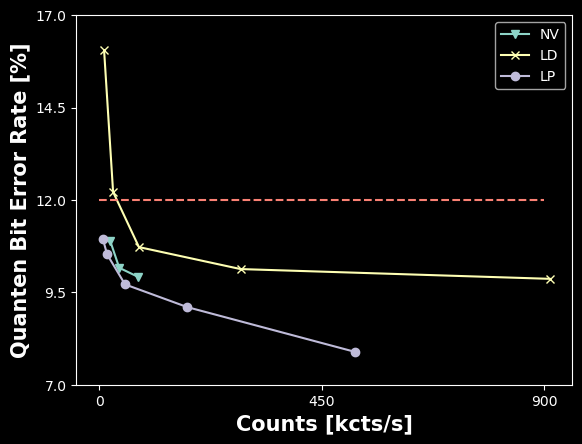

In [89]:
markers = ['v','x','o']
labels = ['NV','LD','LP']
for i in range(3):
  plt.plot(x_q[i],y_q[i]*100,
           marker=markers[i],
           label=labels[i]
           )

p12 = np.ones(1000)*12
x_p12 = np.linspace(-1,900,1000)
plt.plot(x_p12,p12,'--')
plt.xlabel('Counts [kcts/s]',
           fontsize=15, fontweight='bold')
plt.ylabel('Quanten Bit Error Rate [%]',
           fontsize=15, fontweight='bold')
plt.xticks([0,450,900])
plt.yticks([7,9.5,12,14.5,17])
plt.legend()
# plt.savefig('QBER.png',dpi=600,transparent=True)
plt.show()

# Regression: Effizienz

In [77]:
y = [
    # NF
    nf_pic_info['Counts [kcts/s]'],
    ld_pic_info['Counts [kcts/s]'],
    lp_pic_info['Counts [kcts/s]']
]
y_err = [
    nf_pic_info['std counts'],
    ld_pic_info['std counts'],
    lp_pic_info['std count']
]
x = [
    nf_df['Mean'],
    ld_df['Mean'],
    lp_df['Mean']
]
x_err = [
    nf_df['Std'],
    ld_df['Std'],
    lp_df['Std']
]
labels = ['NF','LD','LP']

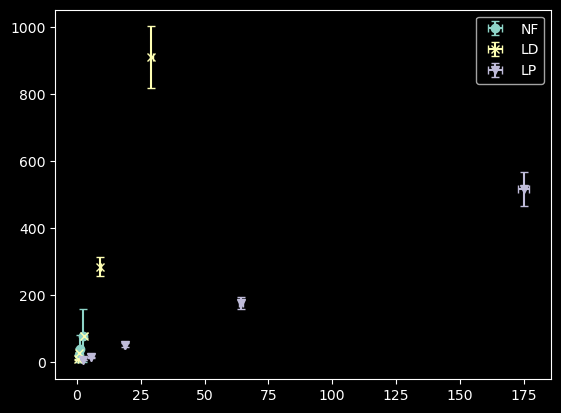

In [86]:
markers = ['o','x','v']
for i in range(3):
  plt.errorbar(x[i],y[i],
               xerr=x_err[i],
               yerr=y_err[i],
               marker=markers[i],
               linestyle='None',
               capsize=3,
               label=labels[i]
               )
plt.legend()
plt.show()

In [79]:
X = []
m = []
r = []
summary = []
for i in range(len(x)):
  a = sm.add_constant(x[i])
  X.append(a)
  b = sm.WLS(y[i],a,weights=y_err[i])
  m.append(b)
  c = b.fit()
  r.append(c)
  summary.append(c.summary())

c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [85]:
a_nf = r[0].params[1]
u_a_nf = r[0].bse[1]
b_nf = r[0].params[0]
u_b_nf = r[0].bse[0]
print(f'The paramters for NF are: a={ufloat(a_nf,u_a_nf)} and b={ufloat(b_nf,u_b_nf)}.')

a_ld = r[1].params[1]
u_a_ld = r[1].bse[1]
b_ld = r[1].params[0]
u_b_ld = r[1].bse[0]
print(f'The paramters for LD are: a={ufloat(a_ld,u_a_ld)} and b={ufloat(b_ld,u_b_ld)}.')

a_lp = r[2].params[1]
u_a_lp = r[2].bse[1]
b_lp = r[2].params[0]
u_b_lp = r[2].bse[0]
print(f'The paramters for LP are: a={ufloat(a_lp,u_a_lp)} and b={ufloat(b_lp,u_b_lp)}. \n')


The paramters for NF are: a=33.10+/-0.20 and b=-1.8+/-0.4.
The paramters for LD are: a=31.25+/-0.04 and b=-0.9+/-0.9.
The paramters for LP are: a=3.018+/-0.033 and b=-11+/-5. 



C:\Users\benjf\AppData\Local\Temp\ipykernel_12688\2573163579.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a_nf = r[0].params[1]
C:\Users\benjf\AppData\Local\Temp\ipykernel_12688\2573163579.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  u_a_nf = r[0].bse[1]
C:\Users\benjf\AppData\Local\Temp\ipykernel_12688\2573163579.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b_nf = r[0].params[0]
C:\Users\benjf\AppData\Local\Tem

In [81]:
# help(plt.plot)

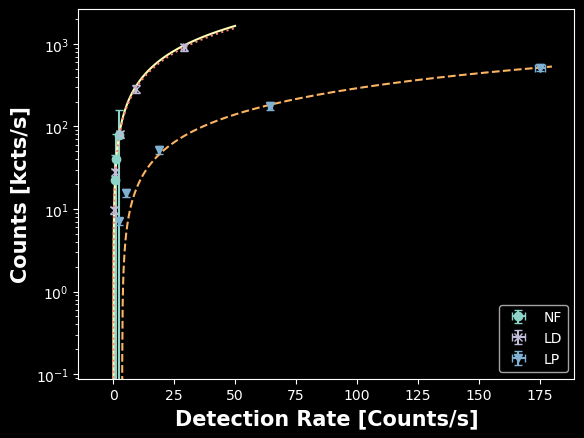

In [84]:
markers = ['o','x','v']
zero_line = np.linspace(-6,200,1000)
x_reg = [np.linspace(-5,50,1000),np.linspace(-5,50,1000),np.linspace(-5,180,1000)]
params = [
    np.array([a_nf,b_nf]),
    np.array([a_ld,b_ld]),
    np.array([a_lp,b_lp])]
line_styles = ['solid','dotted','dashed']
for i in range(3):
  plt.errorbar(x[i],y[i],
               xerr=x_err[i],
               yerr=y_err[i],
               marker=markers[i],
               linestyle='None',
               capsize=3,
               label=labels[i]
               )
  plt.plot(x_reg[i],params[i][0]*x_reg[i]+params[i][1],
           linestyle=line_styles[i],
          #  label=f'Reg. of {labels[i]}.'
           )
# plt.plot(zero_line,0*zero_line)
plt.axhline(0, color='black',linewidth=0.5)
plt.yticks([-250,0,250,750,1250,1750])
plt.ylabel('Counts [kcts/s]',
           fontsize=15, fontweight='bold')
plt.xlabel('Detection Rate [Counts/s]',
           fontsize=15, fontweight='bold')
plt.legend()
plt.yscale('log')
# plt.savefig('Übertragungseffizient.png',dpi=700,transparent=True)
plt.show()

# Effizienz